# USA Houses Analysis

Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?

Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?

A House Rocket deveria fazer uma reforma para aumentar o preço da venda? 

Quais seriam as sugestões de mudanças? 

Qual o incremento no preço dado por cada opção de reforma?

## Importing Libraries and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
df = pd.read_csv('../raw_data/kc_house_data.csv', parse_dates =['date'])

In [211]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Features Selection

### Filter Methods

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [126]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [127]:
df.duplicated().sum()

0

#### Pearson's Correlation

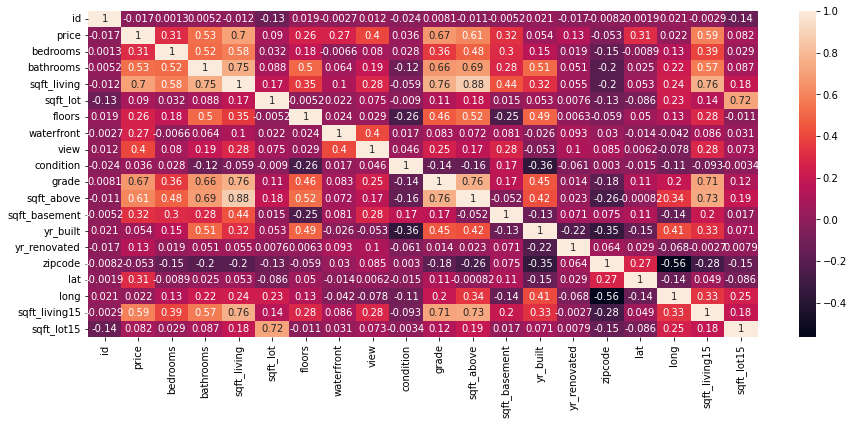

In [129]:
import seaborn as sns

dfcorr = df.corr()

plt.figure(figsize = (15,6))
sns.heatmap(dfcorr, annot = True)
plt.show()

In [118]:
df.corr()['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [219]:
X = df.drop(['zipcode','id','date','price'], axis=1)
y = df['price']

#### P-Value

In [192]:
import statsmodels.api as sm
ols = sm.OLS(y, sm.add_constant(X)).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     3082.
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:55:05   Log-Likelihood:            -2.9476e+05
No. Observations:               21613   AIC:                         5.895e+05
Df Residuals:                   21596   BIC:                         5.897e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.686e+07    1.6e+06    -23.105      0.000      -4e+07   -3.37e+07
bedrooms      -3.415e+04   1903.178    -17.945      0.000   -3.79e+04   -3.04e+04
bathrooms      4.216e+04   3276.490     12.868      0.000    3.57e+04    4.86e+04
sqft_living     108.7229      2.284     47.606      0.000     104.247     113.199
sqft_lot          0.1274      0.048      2.640      0.008       0.033       0.222
floors          760.6881   3605.813      0.211      0.833   -6306.972    7828.348
waterfront     5.878e+05   1.75e+04     33.625      0.000    5.54e+05    6.22e+05
view           4.943e+04   2146.437     23.028      0.000    4.52e+04    5.36e+04
condition      3.103e+04   2353.444     13.186      0.000    2.64e+04    3.56e+04
grade          9.722e+04   2166.897     44.866      0.000     9.3e+04    1.01e+05
sqft_above       70.7909      2.270     31.191      0.000      66.342      75.240
sqft_basement    37.9322      2.664     14.241      0.000      32.711      43.153
yr_built      -2456.2763     72.580    -33.842      0.000   -2598.539   -2314.014
yr_renovated     21.5324      3.680      5.850      0.000      14.318      28.746
lat            5.611e+05   1.05e+04     53.197      0.000     5.4e+05    5.82e+05
long           -1.17e+05    1.2e+04     -9.755      0.000   -1.41e+05   -9.35e+04
sqft_living15    27.4312      3.457      7.935      0.000      20.655      34.207
sqft_lot15       -0.3933      0.074     -5.330      0.000      -0.538      -0.249
==============================================================================
Omnibus:                    18537.369   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1882235.907
Skew:                           3.617   Prob(JB):                         0.00
Kurtosis:                      48.142   Cond. No.                     2.40e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.61e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

'Floors' feature has a high p-value, meaning that it's not statistically significant. We will drop it, and re-calculate p-values.

In [194]:
X = df.drop(['zipcode','id','date','price','floors'], axis=1)
y = df['price']

ols = sm.OLS(y, sm.add_constant(X)).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     3287.
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:57:09   Log-Likelihood:            -2.9476e+05
No. Observations:               21613   AIC:                         5.895e+05
Df Residuals:                   21597   BIC:                         5.897e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.692e+07   1.57e+06    -23.516      0.000      -4e+07   -3.38e+07
bedrooms      -3.416e+04   1902.164    -17.961      0.000   -3.79e+04   -3.04e+04
bathrooms      4.234e+04   3164.159     13.381      0.000    3.61e+04    4.85e+04
sqft_living     108.6704      2.271     47.861      0.000     104.220     113.121
sqft_lot          0.1272      0.048      2.636      0.008       0.033       0.222
waterfront     5.879e+05   1.75e+04     33.626      0.000    5.54e+05    6.22e+05
view           4.944e+04   2145.243     23.048      0.000    4.52e+04    5.36e+04
condition        3.1e+04   2347.988     13.202      0.000    2.64e+04    3.56e+04
grade          9.726e+04   2158.970     45.048      0.000     9.3e+04    1.01e+05
sqft_above       70.9708      2.105     33.717      0.000      66.845      75.096
sqft_basement    37.7022      2.429     15.524      0.000      32.942      42.462
yr_built      -2453.0853     70.985    -34.558      0.000   -2592.221   -2313.950
yr_renovated     21.5718      3.676      5.869      0.000      14.367      28.776
lat            5.613e+05   1.05e+04     53.524      0.000    5.41e+05    5.82e+05
long          -1.174e+05   1.19e+04     -9.879      0.000   -1.41e+05   -9.41e+04
sqft_living15    27.3428      3.431      7.969      0.000      20.617      34.068
sqft_lot15       -0.3938      0.074     -5.340      0.000      -0.538      -0.249
==============================================================================
Omnibus:                    18531.230   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1879952.363
Skew:                           3.616   Prob(JB):                         0.00
Kurtosis:                      48.114   Cond. No.                     2.34e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.01e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### VIF Score

Now let's check multicolinearity of all features by VIF score.

In [238]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
X = df.drop(['zipcode','id','date','price','floors'], axis=1)
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

/home/felipe/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [239]:
vif_data

,feature,VIF
0,bedrooms,2.323746e+01
1,bathrooms,2.640870e+01
2,sqft_living,inf
3,sqft_lot,2.362427e+00
4,waterfront,1.212487e+00
5,view,1.548941e+00
6,condition,3.439897e+01
7,grade,1.394712e+02
8,sqft_above,inf
9,sqft_basement,inf


According to this website https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/, standardization might influency in VIF score, so let's try it.

In [240]:
from sklearn.preprocessing import StandardScaler

X_novo = X
model = StandardScaler()
x_scaled = model.fit_transform(X_novo)
df_novo = pd.DataFrame(x_scaled)
df_novo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,-0.352572,-0.306079,-0.943355,-0.260715
1,-0.398737,0.175607,0.533634,-0.189885,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,1.161568,-0.746341,-0.432686,-0.187868
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,1.283537,-0.135655,1.070140,-0.172375
3,0.676485,1.149449,-0.130550,-0.244014,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,-0.283288,-1.271816,-0.914174,-0.284522
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,0.409550,1.199335,-0.272190,-0.192849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.398737,0.500221,-0.598746,-0.337424,-0.087173,-0.305759,-0.629187,0.291916,-0.312039,-0.658681,1.293542,-0.210128,1.004958,-0.938069,-0.666135,-0.412381
21609,0.676485,0.500221,0.250539,-0.224386,-0.087173,-0.305759,-0.629187,0.291916,0.629908,-0.658681,1.463768,-0.210128,-0.356180,-1.051685,-0.228419,-0.203946
21610,-1.473959,-1.772078,-1.154047,-0.332137,-0.087173,-0.305759,-0.629187,-0.558836,-0.927928,-0.658681,1.293542,-0.210128,0.247888,-0.604321,-1.410253,-0.394141
21611,-0.398737,0.500221,-0.522528,-0.307076,-0.087173,-0.305759,-0.629187,0.291916,-0.227505,-0.658681,1.123316,-0.210128,-0.184414,1.028910,-0.841221,-0.420511


In [241]:
vif_data1 = pd.DataFrame()
X_s = df_novo
vif_data1["feature"] = X_s.columns
vif_data1["VIF"] = [variance_inflation_factor(X_s.values, i) for i in range(len(X_s.columns))]
vif_data1

/home/felipe/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,0,1.646520
1,1,3.124132
2,2,inf
3,3,2.101502
4,4,1.203456
5,5,1.421732
6,6,1.228169
7,7,3.388093
8,8,inf
9,9,inf


We saw some improvement, however, some features still have **infinite** VIF score! 

We have some options: remove one or more features leading to a VIF score reduction, use Ridge/Lasso regression for VIF reduction, Linearly combine the independent variables, such as adding them together, perform an analysis designed for highly correlated variables such as principal components analysis or partial least squares regression or just ignore VIF score and move foward. 

Source: https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/ , https://www.sfu.ca/~dsignori/buec333/lecture%2016.pdf

Let's try remove one of them, combine them and do nothing and move foward.

First let's try to remove 'sqft_basement' and see what happens.

In [244]:
df_no_basement = df_novo.drop([9], axis=1)

In [245]:
df_no_basement

,0,1,2,3,4,5,6,7,8,10,11,12,13,14,15
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.544898,-0.210128,-0.352572,-0.306079,-0.943355,-0.260715
1,-0.398737,0.175607,0.533634,-0.189885,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,-0.681079,4.746678,1.161568,-0.746341,-0.432686,-0.187868
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-1.293892,-0.210128,1.283537,-0.135655,1.070140,-0.172375
3,0.676485,1.149449,-0.130550,-0.244014,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,-0.204446,-0.210128,-0.283288,-1.271816,-0.914174,-0.284522
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,0.544548,-0.210128,0.409550,1.199335,-0.272190,-0.192849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.398737,0.500221,-0.598746,-0.337424,-0.087173,-0.305759,-0.629187,0.291916,-0.312039,1.293542,-0.210128,1.004958,-0.938069,-0.666135,-0.412381
21609,0.676485,0.500221,0.250539,-0.224386,-0.087173,-0.305759,-0.629187,0.291916,0.629908,1.463768,-0.210128,-0.356180,-1.051685,-0.228419,-0.203946
21610,-1.473959,-1.772078,-1.154047,-0.332137,-0.087173,-0.305759,-0.629187,-0.558836,-0.927928,1.293542,-0.210128,0.247888,-0.604321,-1.410253,-0.394141
21611,-0.398737,0.500221,-0.522528,-0.307076,-0.087173,-0.305759,-0.629187,0.291916,-0.227505,1.123316,-0.210128,-0.184414,1.028910,-0.841221,-0.420511


In [246]:
vif_data1 = pd.DataFrame()
X_s = df_no_basement
vif_data1["feature"] = X_s.columns
vif_data1["VIF"] = [variance_inflation_factor(X_s.values, i) for i in range(len(X_s.columns))]
vif_data1

,feature,VIF
0,0,1.646520
1,1,3.124132
2,2,7.844140
3,3,2.101502
4,4,1.203456
5,5,1.421732
6,6,1.228169
7,7,3.388093
8,8,5.592194
9,10,2.287108


We saw a huge improvement, but let's reduce even more VIF score of feature number 2. Let's try to combine 'sqft_basement' and 'sqft_above' without droping any feature.

In [247]:
df_novo['sqft_above/sqft_basement'] = df_novo[8]/df_novo[9]
df_novo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,sqft_above/sqft_basement
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,-0.352572,-0.306079,-0.943355,-0.260715,1.115422
1,-0.398737,0.175607,0.533634,-0.189885,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,1.161568,-0.746341,-0.432686,-0.187868,1.879898
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,1.283537,-0.135655,1.070140,-0.172375,1.867116
3,0.676485,1.149449,-0.130550,-0.244014,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,-0.283288,-1.271816,-0.914174,-0.284522,-0.638060
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,0.409550,1.199335,-0.272190,-0.192849,0.198723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.398737,0.500221,-0.598746,-0.337424,-0.087173,-0.305759,-0.629187,0.291916,-0.312039,-0.658681,1.293542,-0.210128,1.004958,-0.938069,-0.666135,-0.412381,0.473733
21609,0.676485,0.500221,0.250539,-0.224386,-0.087173,-0.305759,-0.629187,0.291916,0.629908,-0.658681,1.463768,-0.210128,-0.356180,-1.051685,-0.228419,-0.203946,-0.956318
21610,-1.473959,-1.772078,-1.154047,-0.332137,-0.087173,-0.305759,-0.629187,-0.558836,-0.927928,-0.658681,1.293542,-0.210128,0.247888,-0.604321,-1.410253,-0.394141,1.408766
21611,-0.398737,0.500221,-0.522528,-0.307076,-0.087173,-0.305759,-0.629187,0.291916,-0.227505,-0.658681,1.123316,-0.210128,-0.184414,1.028910,-0.841221,-0.420511,0.345395


In [248]:
df_merge_basement = df_novo.drop([8,9], axis=1)

In [249]:
df_merge_basement

,0,1,2,3,4,5,6,7,10,11,12,13,14,15,sqft_above/sqft_basement
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.087173,-0.305759,-0.629187,-0.558836,-0.544898,-0.210128,-0.352572,-0.306079,-0.943355,-0.260715,1.115422
1,-0.398737,0.175607,0.533634,-0.189885,-0.087173,-0.305759,-0.629187,-0.558836,-0.681079,4.746678,1.161568,-0.746341,-0.432686,-0.187868,1.879898
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.087173,-0.305759,-0.629187,-1.409587,-1.293892,-0.210128,1.283537,-0.135655,1.070140,-0.172375,1.867116
3,0.676485,1.149449,-0.130550,-0.244014,-0.087173,-0.305759,2.444294,-0.558836,-0.204446,-0.210128,-0.283288,-1.271816,-0.914174,-0.284522,-0.638060
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.087173,-0.305759,-0.629187,0.291916,0.544548,-0.210128,0.409550,1.199335,-0.272190,-0.192849,0.198723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.398737,0.500221,-0.598746,-0.337424,-0.087173,-0.305759,-0.629187,0.291916,1.293542,-0.210128,1.004958,-0.938069,-0.666135,-0.412381,0.473733
21609,0.676485,0.500221,0.250539,-0.224386,-0.087173,-0.305759,-0.629187,0.291916,1.463768,-0.210128,-0.356180,-1.051685,-0.228419,-0.203946,-0.956318
21610,-1.473959,-1.772078,-1.154047,-0.332137,-0.087173,-0.305759,-0.629187,-0.558836,1.293542,-0.210128,0.247888,-0.604321,-1.410253,-0.394141,1.408766
21611,-0.398737,0.500221,-0.522528,-0.307076,-0.087173,-0.305759,-0.629187,0.291916,1.123316,-0.210128,-0.184414,1.028910,-0.841221,-0.420511,0.345395


In [251]:
X_s = df_merge_basement
vif_data1["feature"] = X_s.columns
vif_data1["VIF"] = [variance_inflation_factor(X_s.values, i) for i in range(len(X_s.columns))]
vif_data1

,feature,VIF
0,0,1.645940
1,1,3.118087
2,2,5.015476
3,3,2.100300
4,4,1.203732
5,5,1.380502
6,6,1.210057
7,7,3.247355
8,10,2.268080
9,11,1.146620


In [ ]:
ols = sm.OLS(y, sm.add_constant(df_merge_basement)).fit()
ols.summary()

In [184]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [ ]:
break

In [167]:
from sklearn.metrics import mean_absolute_error

for k in range(1,18):
    k = k
    selector = SelectKBest(score_func=f_regression, k=k)
    xtrain2 = selector.fit_transform(X_train, y_train)
    xtest2 = selector.transform(X_test)

    mdl = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)
    mdl.fit(xtrain2, y_train)

    p = mdl.predict(xtest2)

    score = mean_absolute_error(y_test,p)
    print('k = {}, erro ={}'.format(k,score))


k = 1, erro =168776.9511514756
k = 2, erro =162622.4372667729
k = 3, erro =158106.23950091397
k = 4, erro =154880.94035733823
k = 5, erro =149994.76277231335
k = 6, erro =145869.502633384
k = 7, erro =145554.99782492672
k = 8, erro =143232.1599630619
k = 9, erro =90356.26081700074
k = 10, erro =88673.5232352207
k = 11, erro =87629.2248168502
k = 12, erro =86839.63667485965
k = 13, erro =82570.61445550219
k = 14, erro =82250.34614377149
k = 15, erro =79017.10491957125
k = 16, erro =78238.63865680355
k = 17, erro =67792.96150051775


In [171]:
selector.pvalues_

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.74046242e-031,
       1.54025386e-227, 6.61201682e-272, 0.00000000e+000, 8.61749650e-008,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.28376143e-010,
       2.92281671e-053, 0.00000000e+000, 8.39862155e-003, 0.00000000e+000,
       9.44401694e-025])

In [158]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

Feature 0: 1523.548009
Feature 1: 5610.308100
Feature 2: 14351.352255
Feature 3: 97.882885
Feature 4: 1070.592682
Feature 5: 1147.462016
Feature 6: 2680.398991
Feature 7: 17.980178
Feature 8: 12204.500986
Feature 9: 8553.069722
Feature 10: 1674.543266
Feature 11: 40.437969
Feature 12: 247.498704
Feature 13: 1722.725547
Feature 14: 6.217592
Feature 15: 7695.855210
Feature 16: 98.335932


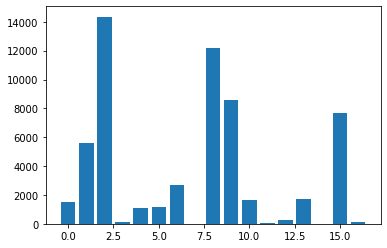

In [159]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [138]:
fs.pvalues_

array([1.30831794e-317, 0.00000000e+000, 0.00000000e+000, 5.21345852e-023,
       6.07103089e-227, 1.64982748e-242, 0.00000000e+000, 2.24542906e-005,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 2.08783746e-010,
       2.50147092e-055, 0.00000000e+000, 1.26592991e-002, 0.00000000e+000,
       4.15341339e-023])

In [146]:
fs.

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [153]:
X_train_fs[0]

array([ 3.00000e+00,  2.00000e+00,  1.54000e+03,  6.25000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.54000e+03,  0.00000e+00,  1.99800e+03,
        0.00000e+00,  4.73539e+01, -1.22025e+02,  2.07000e+03,
        6.25000e+03])

### Wrapper Methods

### Embedded Methods

## Model Selection

### Linear Regression

### Polynomial Regression

### Ridge ans Lasso Regression

### Support Vector Regression (SVR)

### Decision Tree

In [ ]:
X = df.drop(columns=['price','id','zipcode','date'])
y = df['price']

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

tree = DecisionTreeRegressor()

cv_results = cross_validate(tree, X, y, scoring = "r2", cv=5)

cv_results['test_score'].mean()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

forest = RandomForestRegressor(n_estimators=100)

cv_results = cross_validate(forest, X, y, scoring = "r2", cv=5)

cv_results['test_score'].mean()

### XGBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(
    DecisionTreeRegressor(),
    n_estimators=100)

cv_results = cross_validate(adaboost, X, y, scoring = "r2", cv=5)

cv_results['test_score'].mean()

Categorical : Bedrooms, Bathrooms, Waterfront, view, condition, grade, floors

In [62]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = enc.fit_transform(df[['floors']]).toarray()
# passing view-types-cat column (label encoded values of view_types)
enc_df = pd.DataFrame(enc_df, columns = ["floors_"+str(int(i)) for i in range(enc_df.shape[1])])
enc_df

,floors_0,floors_1,floors_2,floors_3,floors_4,floors_5
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
21608,0.0,0.0,0.0,0.0,1.0,0.0
21609,0.0,0.0,1.0,0.0,0.0,0.0
21610,0.0,0.0,1.0,0.0,0.0,0.0
21611,0.0,0.0,1.0,0.0,0.0,0.0


In [63]:
# merge with main df on key values
bridge1_df = bridge1_df.join(enc_df)
bridge1_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade_8,grade_9,grade_10,grade_11,floors_0,floors_1,floors_2,floors_3,floors_4,floors_5
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [71]:
bridge1_df.corr()['price'].sort_values(ascending = False).sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
                   ...   
bathrooms_3     -0.244887
floors_0        -0.263588
waterfront_0    -0.266369
grade_5         -0.315803
view_0          -0.359120
Name: price, Length: 93, dtype: float64

In [73]:
import statsmodels.api as sm

X = bridge1_df.drop(columns=['price','id','zipcode','date','bedrooms', 'bathrooms', 'waterfront', 'view', 'condition', 'grade', 'floors'])
y = bridge1_df['price']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     811.7
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:28:57   Log-Likelihood:            -2.9310e+05
No. Observations:               21613   AIC:                         5.864e+05
Df Residuals:                   21537   BIC:                         5.870e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.461e+07   6.73e+05    -21.723

In [72]:
import statsmodels.api as sm

X = bridge1_df.drop(columns=['price','id','zipcode','date'])
y = bridge1_df['price']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

/home/felipe/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     811.7
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:28:17   Log-Likelihood:            -2.9310e+05
No. Observations:               21613   AIC:                         5.864e+05
Df Residuals:                   21537   BIC:                         5.870e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.886e+06   2.99e+05    -23.027

In [82]:
from sklearn.preprocessing import StandardScaler

X = bridge1_df.drop(['price','id','zipcode','date','bedrooms', 'bathrooms', 'waterfront', 'view', 'condition', 'grade', 'floors'],axis = 1)
model = StandardScaler()
x_scaled = model.fit_transform(X)
df_novo = pd.DataFrame(x_scaled)

In [84]:
df_novo

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,-0.979835,-0.228321,-0.734708,-0.658681,-0.544898,-0.210128,-0.352572,-0.306079,-0.943355,-0.260715,...,-0.235316,-0.137143,-0.064665,-0.024533,1.011775,-0.311351,-0.78504,-0.086632,-0.170852,-0.019243
1,0.533634,-0.189885,0.460841,0.245141,-0.681079,4.746678,1.161568,-0.746341,-0.432686,-0.187868,...,-0.235316,-0.137143,-0.064665,-0.024533,-0.988362,-0.311351,1.27382,-0.086632,-0.170852,-0.019243
2,-1.426254,-0.123298,-1.229834,-0.658681,-1.293892,-0.210128,1.283537,-0.135655,1.070140,-0.172375,...,-0.235316,-0.137143,-0.064665,-0.024533,1.011775,-0.311351,-0.78504,-0.086632,-0.170852,-0.019243
3,-0.130550,-0.244014,-0.891699,1.397515,-0.204446,-0.210128,-0.283288,-1.271816,-0.914174,-0.284522,...,-0.235316,-0.137143,-0.064665,-0.024533,1.011775,-0.311351,-0.78504,-0.086632,-0.170852,-0.019243
4,-0.435422,-0.169653,-0.130895,-0.658681,0.544548,-0.210128,0.409550,1.199335,-0.272190,-0.192849,...,-0.235316,-0.137143,-0.064665,-0.024533,1.011775,-0.311351,-0.78504,-0.086632,-0.170852,-0.019243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.598746,-0.337424,-0.312039,-0.658681,1.293542,-0.210128,1.004958,-0.938069,-0.666135,-0.412381,...,-0.235316,-0.137143,-0.064665,-0.024533,-0.988362,-0.311351,-0.78504,-0.086632,5.853012,-0.019243
21609,0.250539,-0.224386,0.629908,-0.658681,1.463768,-0.210128,-0.356180,-1.051685,-0.228419,-0.203946,...,-0.235316,-0.137143,-0.064665,-0.024533,-0.988362,-0.311351,1.27382,-0.086632,-0.170852,-0.019243
21610,-1.154047,-0.332137,-0.927928,-0.658681,1.293542,-0.210128,0.247888,-0.604321,-1.410253,-0.394141,...,-0.235316,-0.137143,-0.064665,-0.024533,-0.988362,-0.311351,1.27382,-0.086632,-0.170852,-0.019243
21611,-0.522528,-0.307076,-0.227505,-0.658681,1.123316,-0.210128,-0.184414,1.028910,-0.841221,-0.420511,...,-0.235316,-0.137143,-0.064665,-0.024533,-0.988362,-0.311351,1.27382,-0.086632,-0.170852,-0.019243


In [85]:
bridge1_df = df_novo.join(bridge1_df['price'])

In [86]:
bridge1_df

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,price
0,-0.979835,-0.228321,-0.734708,-0.658681,-0.544898,-0.210128,-0.352572,-0.306079,-0.943355,-0.260715,...,-0.137143,-0.064665,-0.024533,1.011775,-0.311351,-0.78504,-0.086632,-0.170852,-0.019243,221900.0
1,0.533634,-0.189885,0.460841,0.245141,-0.681079,4.746678,1.161568,-0.746341,-0.432686,-0.187868,...,-0.137143,-0.064665,-0.024533,-0.988362,-0.311351,1.27382,-0.086632,-0.170852,-0.019243,538000.0
2,-1.426254,-0.123298,-1.229834,-0.658681,-1.293892,-0.210128,1.283537,-0.135655,1.070140,-0.172375,...,-0.137143,-0.064665,-0.024533,1.011775,-0.311351,-0.78504,-0.086632,-0.170852,-0.019243,180000.0
3,-0.130550,-0.244014,-0.891699,1.397515,-0.204446,-0.210128,-0.283288,-1.271816,-0.914174,-0.284522,...,-0.137143,-0.064665,-0.024533,1.011775,-0.311351,-0.78504,-0.086632,-0.170852,-0.019243,604000.0
4,-0.435422,-0.169653,-0.130895,-0.658681,0.544548,-0.210128,0.409550,1.199335,-0.272190,-0.192849,...,-0.137143,-0.064665,-0.024533,1.011775,-0.311351,-0.78504,-0.086632,-0.170852,-0.019243,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.598746,-0.337424,-0.312039,-0.658681,1.293542,-0.210128,1.004958,-0.938069,-0.666135,-0.412381,...,-0.137143,-0.064665,-0.024533,-0.988362,-0.311351,-0.78504,-0.086632,5.853012,-0.019243,360000.0
21609,0.250539,-0.224386,0.629908,-0.658681,1.463768,-0.210128,-0.356180,-1.051685,-0.228419,-0.203946,...,-0.137143,-0.064665,-0.024533,-0.988362,-0.311351,1.27382,-0.086632,-0.170852,-0.019243,400000.0
21610,-1.154047,-0.332137,-0.927928,-0.658681,1.293542,-0.210128,0.247888,-0.604321,-1.410253,-0.394141,...,-0.137143,-0.064665,-0.024533,-0.988362,-0.311351,1.27382,-0.086632,-0.170852,-0.019243,402101.0
21611,-0.522528,-0.307076,-0.227505,-0.658681,1.123316,-0.210128,-0.184414,1.028910,-0.841221,-0.420511,...,-0.137143,-0.064665,-0.024533,-0.988362,-0.311351,1.27382,-0.086632,-0.170852,-0.019243,400000.0


In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
X = df_novo.drop(['id','zipcode','date','bedrooms', 'bathrooms', 'waterfront', 'view', 'condition', 'grade', 'floors'],axis = 1)
vif_data["feature"] = X.columns

In [75]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

/home/felipe/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [81]:
vif_data[vif_data['VIF'] < 20]

,feature,VIF
0,price,3.826705
2,sqft_lot,2.119989
5,yr_built,3.131428
6,yr_renovated,1.187148
7,lat,1.330931
8,long,1.557652
9,sqft_living15,3.169327
10,sqft_lot15,2.157482


In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
X = bridge1_df
vif_data["feature"] = X.columns

In [88]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

/home/felipe/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [90]:
vif_data[vif_data['VIF'] < 20]

,feature,VIF
1,1,2.119271
4,4,3.065379
5,5,1.181782
6,6,1.176028
7,7,1.553750
8,8,3.146064
9,9,2.153563
83,price,1.304532


In [7]:
import seaborn as sns

In [8]:
df.corr()['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

<AxesSubplot:>

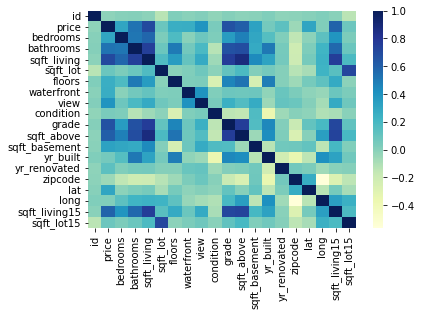

In [9]:
corr = df.corr()

sns.heatmap(corr,
           xticklabels = corr.columns,
           yticklabels = corr.columns,
           cmap= "YlGnBu")

In [32]:
import statsmodels.api as sm

X = df.drop(columns=['price','id','zipcode','date'])
y = df['price']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     3082.
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:28:59   Log-Likelihood:            -2.9476e+05
No. Observations:               21613   AIC:                         5.895e+05
Df Residuals:                   21596   BIC:                         5.897e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.686e+07    1.6e+06    -23.105

https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

In [11]:
from sklearn.preprocessing import StandardScaler

X = df.drop(['date','id','zipcode'],axis = 1)
model = StandardScaler()

In [12]:
x_scaled = model.fit_transform(X)

In [13]:
df_novo = pd.DataFrame(x_scaled)

In [14]:
df_novo[0]

0       -0.866717
1       -0.005688
2       -0.980849
3        0.174090
4       -0.081958
           ...   
21608   -0.490545
21609   -0.381588
21610   -0.375865
21611   -0.381588
21612   -0.585882
Name: 0, Length: 21613, dtype: float64

In [15]:
import statsmodels.api as sm

X = df_novo.drop(columns=[0])
y = df_novo[0]

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

/home/felipe/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     3082.
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:27:52   Log-Likelihood:                -17821.
No. Observations:               21613   AIC:                         3.568e+04
Df Residuals:                   21596   BIC:                         3.581e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.935e-15      0.004   1.58e-12      1.0

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
X = df.drop(['date','id','zipcode'],axis = 1)
vif_data["feature"] = X.columns

In [17]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

/home/felipe/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [18]:
vif_data

,feature,VIF
0,price,1.013817e+01
1,bedrooms,2.364177e+01
2,bathrooms,2.879002e+01
3,sqft_living,inf
4,sqft_lot,2.365799e+00
5,floors,1.673891e+01
6,waterfront,1.275242e+00
7,view,1.593237e+00
8,condition,3.485472e+01
9,grade,1.583009e+02


In [19]:
vif_data

,feature,VIF
0,price,1.013817e+01
1,bedrooms,2.364177e+01
2,bathrooms,2.879002e+01
3,sqft_living,inf
4,sqft_lot,2.365799e+00
5,floors,1.673891e+01
6,waterfront,1.275242e+00
7,view,1.593237e+00
8,condition,3.485472e+01
9,grade,1.583009e+02


In [20]:
X_t = df.drop(['price','date','id'],axis = 1)
y_t = df['price']

In [21]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# define feature selection
fs = SelectKBest(score_func=f_regression, k=18)
# apply feature selection
X_selected = fs.fit_transform(X_t, y_t)
print(X_selected)

[[ 3.00000e+00  1.00000e+00  1.18000e+03 ... -1.22257e+02  1.34000e+03
   5.65000e+03]
 [ 3.00000e+00  2.25000e+00  2.57000e+03 ... -1.22319e+02  1.69000e+03
   7.63900e+03]
 [ 2.00000e+00  1.00000e+00  7.70000e+02 ... -1.22233e+02  2.72000e+03
   8.06200e+03]
 ...
 [ 2.00000e+00  7.50000e-01  1.02000e+03 ... -1.22299e+02  1.02000e+03
   2.00700e+03]
 [ 3.00000e+00  2.50000e+00  1.60000e+03 ... -1.22069e+02  1.41000e+03
   1.28700e+03]
 [ 2.00000e+00  7.50000e-01  1.02000e+03 ... -1.22299e+02  1.02000e+03
   1.35700e+03]]


In [22]:
X_selected.shape

(21613, 18)

In [23]:
fs.pvalues_

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 7.97250451e-040,
       1.58101007e-322, 0.00000000e+000, 0.00000000e+000, 8.93565406e-008,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.92987281e-015,
       1.02134789e-077, 5.01105043e-015, 0.00000000e+000, 1.47509222e-003,
       0.00000000e+000, 6.41755989e-034])

In [24]:
fs.get_params()

{'k': 18,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_regression(X, y, center=True)>}

In [25]:
fs.scores_

array([2.27065523e+03, 8.22894323e+03, 2.10019096e+04, 1.75140305e+02,
       1.52570614e+03, 1.65046304e+03, 4.05045898e+03, 2.86114552e+01,
       1.73606354e+04, 1.25140609e+04, 2.53150633e+03, 6.32290479e+01,
       3.51074838e+02, 6.13445184e+01, 2.24881465e+03, 1.01120709e+01,
       1.12658646e+04, 1.47906887e+02])

In [26]:
corr_df = corr.unstack().reset_index() # Unstack correlation matrix
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
corr_df.head(10)

,feature_1,feature_2,correlation
224,sqft_above,sqft_living,0.876597
91,sqft_living,sqft_above,0.876597
204,grade,sqft_living,0.762704
90,sqft_living,grade,0.762704
98,sqft_living,sqft_living15,0.756420
364,sqft_living15,sqft_living,0.756420
230,sqft_above,grade,0.755923
211,grade,sqft_above,0.755923
83,sqft_living,bathrooms,0.754665
64,bathrooms,sqft_living,0.754665


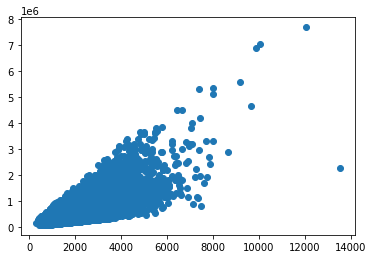

In [27]:
plt.scatter(df['sqft_living'],df['price'])

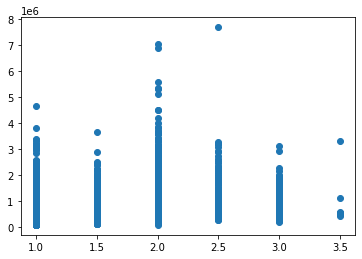

In [28]:
plt.scatter(df['floors'],df['price'])

In [29]:
import statsmodels.api as sm

X = df.drop(columns=['price','id', 'date', 'floors'])
y = df['price']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     3145.
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:27:54   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21596   BIC:                         5.894e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.741e+06   2.89e+06      1.989

/home/felipe/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [30]:
df['date'].dt.year.value_counts()

2014    14633
2015     6980
Name: date, dtype: int64